<a href="https://colab.research.google.com/github/Tohar-Ts/Machine_learning/blob/ex1/MachineLearningEx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
from google.colab import drive
drive.mount('/content/drive')
#create matrix and y vector:
reader = csv.reader(open("/content/drive/MyDrive/ml/EX1/regression.csv", "r"), delimiter=",")
x = list(reader)
data = np.array(x)
y = data[:,-1]
# print(y)
new_column = np.full_like(y, 1)
data = np.column_stack((new_column, data))
data = data[:,:10]
#normalaize data:
col= 10
for i in range(1 , col):
  x = data[:, i: i+1]
  x = x.astype(np.float)
  x = np.transpose(x)
  avg = np.average(x)
  std = np.std(x)
  for j in range (len(x)):
    x[j] = np.round((x[j] - avg)/std , 3)
  x = np.transpose(x)  
  data[:, i: i+1] = x
data = data.astype(np.float)
y = y.astype(np.float)
print('X matrix:\n', data, '\nY vector:\n', y)
#

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X matrix:
 [[ 1.     0.558  0.562 ... -0.132 -0.511 -0.084]
 [ 1.    -0.306 -0.23  ... -0.271 -1.411 -1.596]
 [ 1.    -0.356 -0.27  ... -0.006  0.848  0.691]
 ...
 [ 1.     0.958 -0.278 ... -0.317 -1.736 -2.068]
 [ 1.     0.958 -0.266 ... -0.138 -0.511 -0.311]
 [ 1.     0.958 -0.274 ... -0.421 -2.693 -2.862]] 
Y vector:
 [164.9 161.3 174.7 ... 153.9 175.  213.6]


sec b: function that recives Theta vector and X matrix and returns h(t)

In [ ]:
def calculateH (theta, x):
  h = np.dot(x,theta)
  return h


In [ ]:
#test
t = [1]*10
print(calculateH(t, data[0]))
print(calculateH(t, data))


2.979
[ 2.979 -3.309 -0.314 ... -2.505  0.343 -5.347]


sec c: function that recives X ,Theta and Y and returns J(t)

In [ ]:
def calculateJ (theta, x, y):
  m = x.shape[0]
  h = calculateH(theta, x)
  j = h - y
  j = np.square(j)
  j = np.sum(j)
  j = j/(2*m)
  return j
  

In [ ]:
#test
t = [1,1,1,1,1,1,1,1,1,1]
print(calculateJ(t, data, y))

16171.44053136659


sec d: function that recieves X, Y, Theta and calculate the gradiente of J

In [ ]:
def calculateGradJ(theta, x, y):
  m = x.shape[0] - 1
  xt = np.transpose(x)
  h = calculateH(theta, x)
  gj = xt.dot(h-y)
  gj = 1/m * gj
  return gj

In [ ]:
#test
t = [1,1,1,1,1,1,1,1,1,1]
print(calculateGradJ(t, data, y))
grad = calculateGradJ(t, data, y)
assert(grad.shape[0] != [data.shape[1],])


[-177.72234406    6.78415411    5.33377701  -11.31194284   12.57725938
    6.0567456   -12.35785173    1.03570799    1.9016037     0.9675322 ]


sec e: Gradient Decsent

In [ ]:
def gradientDecsent (x,y,a = 0.01):
  epsilon = 0.01
  n = x.shape[1] #columns
  maxIteretion = 100
  k = 0
  tOld = np.zeros((n, 1)) #for halt condition
  t = np.ones((n,1))
  jOld = 0
  j = calculateJ(t,x,y)
  x_coordinate = []
  y_coordinate  = []
  while(k < maxIteretion and  np.linalg.norm(t - tOld) >epsilon):
    jOld = j
    j = calculateJ(t,x,y)
    y_coordinate.append(j)
    grad = calculateGradJ(t,x,y)
    t = t-a*grad #fix theta vector
    k= k+1

  x_coordinate = np.arange(0,k)
  # print(t)
  return x_coordinate, y_coordinate

average running time for gradientDecsent: 16.505936 seconds


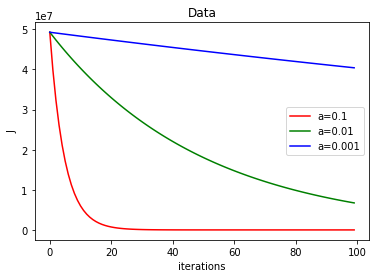

In [ ]:
import time
tic = time.time()
x1, y1 = gradientDecsent(data, y, 0.1)
toc = time.time()
time1 = toc - tic

tic = time.time()
x2, y2 = gradientDecsent(data, y, 0.01)
toc = time.time()
time2 = toc - tic

tic = time.time()
x3, y3 = gradientDecsent(data, y, 0.001)
toc = time.time()
time3 = toc - tic
avg = (time1+time2+time3)/3
print('average running time for gradientDecsent: %f seconds' %avg)
plt.plot(x1, y1, 'r', label='a=0.1')   # scatter plot showing actual data
plt.plot(x2, y2, 'g', label='a=0.01')   # scatter plot showing actual data
plt.plot(x3, y3, 'b', label='a=0.001')   # scatter plot showing actual data
plt.title('Data')
plt.xlabel('iterations')
plt.ylabel('J')
plt.legend()
plt.show()

sec F: run stochastic GD, mini-batch and compare to gd

In [ ]:
def stochastic(x, y, a):
  maxIteretion = 500
  k=0  
  i = 0
  epsilon = 0.01
  jOld = 0 #for halt condition
  m = x.shape[0] - 1 #rows
  n = x.shape[1] #columns
  tOld = np.zeros((n, 1)) #for halt condition
  t = np.ones((n,1))
  # t = t.reshape(n)
  # tOld = tOld.reshape(n)
  tDif = np.linalg.norm(t-tOld)
  j = calculateJ(t, x, y)
  x_coordinate = []
  y_coordinate  = []
  while(k < maxIteretion and (abs(j- jOld) > epsilon) and tDif >epsilon):
    if( k != 0):
      tOld = t
      jOld = j
    i = i % m # one example at a time, max m examples
    j = calculateJ(t, x, y) #err function (needs to get smaller)
    y_coordinate.append(j) 
    h = calculateH(t, x[i]) #calculate only 1 example from the x matrix
    xt = a* x[i] *(h - y[i])
    t = t - xt.reshape((n,1))
    tDif = np.linalg.norm(t-tOld)
    k= k+1
    i= i+1
  x_coordinate = np.arange(0,k)
  # print(x_coordinate, '\n', y_coordinate, '\n',k)
  return x_coordinate, y_coordinate

In [ ]:
def batches(x, y, batchSize):
    miniBatches = []
    batchsAmount = x.shape[0] // batchSize
    yFlip = y.reshape(x.shape[0], 1) #change y to matrix mX1
    d = np.append(x, yFlip, axis=1)#combain x matrix and y vector
    np.random.shuffle(d) # mix matrix rows
    # i = 0
    for i in range(batchsAmount + 1):
      if i * batchSize + (i + 1) * batchSize > x.shape[0]:
        batchI = d[i * batchSize:d.shape[0]]
      else:
        batchI = d[i * batchSize:(i + 1) * batchSize, :]
      xBatch = batchI[:, :-1]
      yBatch = batchI[:, -1]
      miniBatches.append((xBatch, yBatch))
    return miniBatches


def miniBatch(x, y, a=0.1, batchSize=32, epsilon = 0.01):
    maxIteretion = 500
    k=0 
    i=0 
    m = x.shape[0] #rows
    n = x.shape[1] #columns
    tOld = np.zeros((n))
    t = np.ones((n))
    j = calculateJ(t, x, y)
    jOld = 0
    x_coordinate = []
    y_coordinate  = []
    miniBatches = batches(x, y, batchSize)
    while(i < maxIteretion and (np.linalg.norm(t-tOld) > epsilon) and (abs(j-jOld) > epsilon)):
      for batch in miniBatches:
        xBatch, yBatch = batch
        tOld = t
        t = t - a* calculateGradJ(t, xBatch, yBatch)
        jOld = j
        j = calculateJ(t, x, y)
        y_coordinate.append(j)
        k += 1
        i+=1
        x_coordinate.append(i) 
    return x_coordinate, y_coordinate

stochastic's running time was 14.190084 seconds
mini batch's running time was 0.056226 seconds


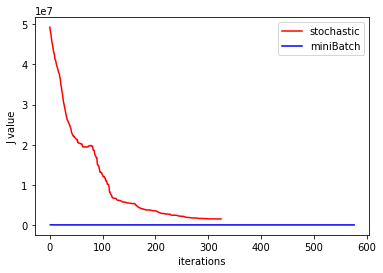

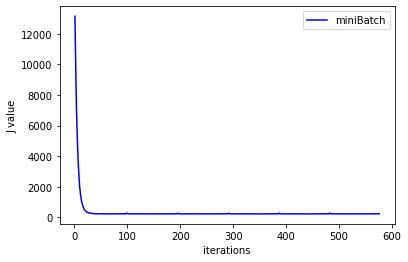

In [ ]:
import time
tic = time.time()
x4, y4 = stochastic(data, y, 0.01)
toc = time.time()
time1 = toc - tic

tic = time.time()
x5, y5 = miniBatch(data, y)
toc = time.time()
time2 = toc - tic

print("stochastic's running time was %f seconds" % time1)
print("mini batch's running time was %f seconds" % time2)
p1 = plt.figure(1)
plt.plot(x4, y4, 'r', label='stochastic') 
plt.plot(x5, y5, 'b', label='miniBatch')  
plt.xlabel('iterations')
plt.ylabel('J value')
plt.legend()

p1 = plt.figure(2)
plt.plot(x5, y5, 'b', label='miniBatch')  
plt.xlabel('iterations')
plt.ylabel('J value')
plt.legend()

plt.show()


